# CAR PRICE PREDICTON

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso

from sklearn.metrics import r2_score, mean_absolute_error

In [68]:
df=pd.read_csv("CarPrice_Assignment.csv")

In [69]:
df.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
80,81,3,mitsubishi mirage g4,gas,turbo,two,hatchback,fwd,front,96.3,...,110,spdi,3.17,3.46,7.50,116,5500,23,30,9959.0
20,21,0,chevrolet vega 2300,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6575.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.0
132,133,3,saab 99e,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850.0
32,33,1,honda civic,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.07,10.10,60,5500,38,42,5399.0
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.0
66,67,0,mazda rx-7 gs,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.00,72,4200,31,39,18344.0
140,141,2,subaru dl,gas,std,two,hatchback,4wd,front,93.3,...,108,2bbl,3.62,2.64,8.70,73,4400,26,31,7603.0
179,180,3,toyota corona,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.30,161,5200,19,24,15998.0
123,124,-1,plymouth valiant,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.35,3.46,8.50,88,5000,24,30,8921.0


In [70]:
df.drop(columns=["car_ID","CarName"],inplace=True)

In [71]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [78]:
df["cylindernumber"].value_counts()

cylindernumber
4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: count, dtype: int64

In [73]:
df["doornumber"].value_counts()
word_to_int = {
    "zero": 0,
    "one": 1,
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
    "six": 6,
    "seven": 7,
    "eight": 8,
    "nine": 9,
    "ten": 10,
    "eleven":11,
    "twelve":12
}

# Replace
df["doornumber"] = df["doornumber"].str.lower().map(word_to_int)
df["cylindernumber"]=df["cylindernumber"].str.lower().map(word_to_int)

In [77]:
# df
df["doornumber"].value_counts()

doornumber
4    115
2     90
Name: count, dtype: int64

In [76]:
df["aspiration"].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

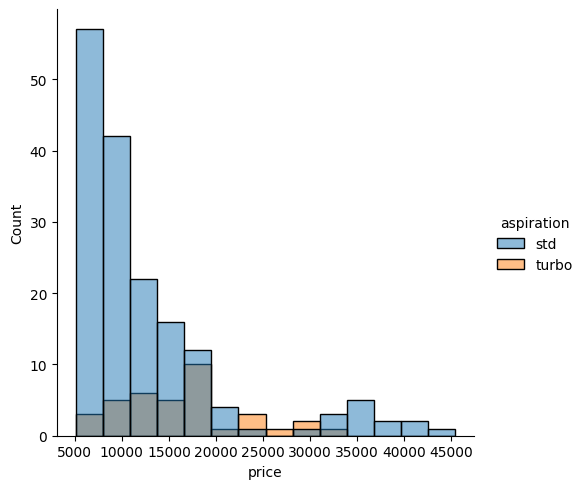

In [26]:
sns.displot(data=df,x="price",kind="hist",hue="aspiration")

In [79]:
x=df.drop(columns=["price"])
y=df["price"]

In [80]:
x

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,4,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,-1,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,4,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,-1,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,6,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,-1,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,6,145,idi,3.01,3.40,23.0,106,4800,26,27


In [81]:
df.corr(numeric_only=True)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.664073,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
doornumber,-0.664073,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
wheelbase,-0.531954,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.113129,-0.016009,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,-0.105790,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.119258,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173


In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [83]:
x_train

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
71,-1,gas,std,4,sedan,rwd,front,115.6,202.6,71.7,...,8,234,mpfi,3.46,3.10,8.3,155,4750,16,18
9,0,gas,turbo,2,hatchback,4wd,front,99.5,178.2,67.9,...,5,131,mpfi,3.13,3.40,7.0,160,5500,16,22
118,1,gas,std,2,hatchback,fwd,front,93.7,157.3,63.8,...,4,90,2bbl,2.97,3.23,9.4,68,5500,37,41
174,-1,diesel,turbo,4,sedan,fwd,front,102.4,175.6,66.5,...,4,110,idi,3.27,3.35,22.5,73,4500,30,33
146,0,gas,std,4,wagon,fwd,front,97.0,173.5,65.4,...,4,108,2bbl,3.62,2.64,9.0,82,4800,28,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,0,gas,std,4,sedan,rwd,front,94.3,170.7,61.8,...,4,111,2bbl,3.31,3.23,8.5,78,4800,24,29
22,1,gas,std,2,hatchback,fwd,front,93.7,157.3,63.8,...,4,90,2bbl,2.97,3.23,9.4,68,5500,31,38
72,3,gas,std,2,convertible,rwd,front,96.6,180.3,70.5,...,8,234,mpfi,3.46,3.10,8.3,155,4750,16,18
15,0,gas,std,4,sedan,rwd,front,103.5,189.0,66.9,...,6,209,mpfi,3.62,3.39,8.0,182,5400,16,22


In [84]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 71 to 168
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         164 non-null    int64  
 1   fueltype          164 non-null    object 
 2   aspiration        164 non-null    object 
 3   doornumber        164 non-null    int64  
 4   carbody           164 non-null    object 
 5   drivewheel        164 non-null    object 
 6   enginelocation    164 non-null    object 
 7   wheelbase         164 non-null    float64
 8   carlength         164 non-null    float64
 9   carwidth          164 non-null    float64
 10  carheight         164 non-null    float64
 11  curbweight        164 non-null    int64  
 12  enginetype        164 non-null    object 
 13  cylindernumber    164 non-null    int64  
 14  enginesize        164 non-null    int64  
 15  fuelsystem        164 non-null    object 
 16  boreratio         164 non-null    float64
 17  s

In [90]:
ohe=ColumnTransformer([
    ("trf1",OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),[1,2,4,5,6,12,13,15])
],remainder="passthrough")

In [178]:
# trf2=LinearRegression()
trf2=Lasso(alpha=25)

In [179]:
model=make_pipeline(ohe,trf2)

In [180]:
model.fit(x_train,y_train)

,steps,"[('columntransformer', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('trf1', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [181]:
y_pred=model.predict(x_test)

/Users/keshavmacbook/Projects/AI-ML/200days100model/venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [182]:
r2_score(y_pred,y_test)

0.7917886459665588

In [183]:
mean_absolute_error(y_pred,y_test)

2234.937522956641

In [189]:
lasso_coef_ = model.named_steps["lasso"].coef_

2881.187272631474

In [190]:
# 1. Get the OneHotEncoder from the ColumnTransformer
ohe_step = model.named_steps['columntransformer']
ohe_transformer = ohe_step.named_transformers_['trf1']

# 2. Get names of one-hot encoded features
ohe_feature_names = ohe_transformer.get_feature_names_out()

# 3. Get passthrough feature names (remainder columns)
# We'll manually extract column names from the training data
# So make sure x_train is a DataFrame


# All column indices
all_cols = np.arange(x_train.shape[1])

# Get passthrough column indices
ohe_cols = np.array([1,2,4,5,6,12,13,15])
passthrough_cols = np.setdiff1d(all_cols, ohe_cols)

# Names of passthrough columns
passthrough_feature_names = x_train.columns[passthrough_cols]


In [191]:
# Combine both one-hot encoded and passthrough features
all_feature_names = np.concatenate([ohe_feature_names, passthrough_feature_names])


In [192]:
# Get Lasso coefficients
lasso_coef = model.named_steps['lasso'].coef_

# Create DataFrame to inspect


coef_df = pd.DataFrame({
    "Feature": all_feature_names,
    "Coefficient": lasso_coef
})

# Features dropped (coefficient = 0)
dropped = coef_df[coef_df["Coefficient"] == 0]
print("🔻 Features dropped by Lasso:")
print(dropped)

print(f"\nTotal features dropped: {len(dropped)} / {len(coef_df)}")


🔻 Features dropped by Lasso:
             Feature  Coefficient
0       fueltype_gas         -0.0
2    carbody_hardtop         -0.0
4      carbody_sedan          0.0
6     drivewheel_fwd         -0.0
9   enginetype_dohcv         -0.0
10      enginetype_l         -0.0
12   enginetype_ohcf         -0.0
20   fuelsystem_2bbl          0.0
21   fuelsystem_4bbl          0.0
22    fuelsystem_idi          0.0
23   fuelsystem_mpfi          0.0
25   fuelsystem_spfi         -0.0
34         boreratio         -0.0
36  compressionratio         -0.0
39           citympg          0.0

Total features dropped: 15 / 41
